# Import Libraries

In [6]:
from tqdm import tqdm
import pandas as pd
import nltk
from nltk import word_tokenize
import string
import numpy as np

from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import wilcoxon

import matplotlib.pyplot as plt

#%pip install utils
!pip install utils
from utils import load_sessions, read_session
from main import generate_buffer
from events import generate_event_seq
from summary import stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ImportError: ignored

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!ls
!ls drive/

!ls drive/MyDrive

drive  sample_data
MyDrive
 0U2A0083.jpg
 0U2A0163.jpg
 0U2A9822.jpg
 1075356_704390336241516_191092463_o.jpg
 175124_542319382449022_534444776_o.jpg
 20130803_210641.jpg
 20130803_210700.jpg
 20141031_SHIBANI_CV.docx
 20141031_SHIBANI_CV.pdf
'2014 May 26 Initial Findings OER62_12EK - Solving problems in groups_updated.pptx'
'2018 UTS T&L forum.gdoc'
 2020-09-16.pdf
 542515_466708963359775_1711959413_n.jpg
'5-year plan.gdoc'
 A14I6696.jpg
'AcaWriter Feedback Questionnaire.gform'
'Activity Feedback.gform'
'Advanced Analytics+Hadoop.ppt'
'ALASI 2019 - Learning Analytics Growing Pains (Notes).gdoc'
 All_Files
 analytics-in-higher-education.pdf
'ANLP Design 2023.gdoc'
 art%3A10.1007%2Fs11409-010-9061-5.pdf
'attachment1 - Details of things to see and do on the Central Coast.pdf'
'Augmenting pedagogic writing practice with CLAD_Shibani.pptx'
'Aus stamp arrival.jpg'
'B44966-AILEEN SHIBANI MICHAEL XAVIERANTONETTE MS-Itinerary & Costing - Full.pdf'
 basicprofessional_36x48.pptx
'Book Chapter - 

# Compute summary statistics

In [ ]:
sessions = load_sessions()
# sessions = load_sessions()[:10]

file_name = []
text = []
sentence_metrics_list = []
api_metrics_list = []

err = []

for sess in tqdm(sessions):
    events = read_session(sess, verbose=0)
    try:
        text_buffer = generate_buffer(events)
    except:
        err.append(str(sess.split('/')[-1]) + " is throwing an error!")
        continue
    file_name.append(sess.split('/')[-1])
    text.append(text_buffer[-1])
    event_seq_dict = generate_event_seq(buffer=text_buffer,
                                        events=events)
    sentence_metrics, api_metrics = stats(event_seq_dict)
    sentence_metrics_list.append(sentence_metrics)
    api_metrics_list.append(api_metrics)
    
for e in err:
    print(e)
    
df = pd.DataFrame()

df["file_name"] = file_name
df["text"] = text

for col in sentence_metrics_list[0]:
    df[str(col)] = [x[col] for x in sentence_metrics_list]
    
for col in api_metrics_list[0]:
    df[str(col)] = [x[col] for x in api_metrics_list]

# Ratios

In [ ]:
def get_ratio(num1, num2):
    return float(num1 / num2)


def add(num1, num2):
    return num1 + num2

In [ ]:
# GPT-3 : Total Sentences

df["GPT-3 : Total Sentences"] = list(map(get_ratio, 
    df["Number of sentences completely authored by GPT-3"], 
    df["Total number of sentences"]
))

df["GPT-3 : Total Sentences"]

In [ ]:
# User : Total Sentences

df["User : Total Sentences"] = list(map(get_ratio, 
    df["Number of sentences completely authored by the user"], 
    df["Total number of sentences"]
))

df["User : Total Sentences"]

In [ ]:
# Amount of usage of GPT-3 (SD+SE/SA)

df["Amount of GTP-3 Usage"] = list(map(get_ratio, 
    pd.Series(list(map(add, df["Number of sentences authored by GPT-3 and user"], 
                       df["Number of sentences completely authored by GPT-3"]))), 
    df["Total number of sentences"]
))

df["Amount of GTP-3 Usage"]

In [ ]:
# Type Token Ratio

def get_ttr(text):
    sentence_tokens = word_tokenize(text)
    punctuations = list(string.punctuation)
    sentence_tokens_clean = [word for word in sentence_tokens if word not in punctuations]
    ttr = len(set(sentence_tokens_clean)) / len(sentence_tokens_clean)
    return ttr


df["Type Token Ratio"] = df["text"].apply(get_ttr)
df["Type Token Ratio"]

# View DataFrame

In [ ]:
df.head()

# Export to CSV

In [ ]:
df.to_csv("coauthorviz_metrics.csv")

# Read from CSV

In [ ]:
df = pd.read_csv("coauthorviz_metrics.csv").drop("Unnamed: 0", axis=1)
df.head()

,file_name,text,Total number of sentences,Number of sentences of initial prompt,Number of sentences completely authored by the user,Number of sentences completely authored by GPT-3,Number of sentences authored by GPT-3 and user,Total number of GPT-3 calls made,Number of times GPT-3 suggestion is used,Number of times user rejected GPT-3 suggestion,Number of times GPT-3 suggestion is modified,Number of times GPT-3 suggestion is used as is,GPT-3 : Total Sentences,User : Total Sentences,Amount of GTP-3 Usage,Type Token Ratio
0,8c11358444974bf0b5224183acd8149d.jsonl,What Stereotypical Characters Make You Cringe?...,15,4,6,0,5,5,5,0,3,2,0.00000,0.400000,0.333333,0.564706
1,c7dc5563ed07478f9284190b6085f4d3.jsonl,How Worried Should We Be About Screen Time Dur...,20,6,10,0,4,6,4,2,3,1,0.00000,0.500000,0.200000,0.613559
2,05a000131fc642f7bb20b62bb20a326e.jsonl,"All of the ""#1 Dad"" mugs in the world change t...",22,1,18,0,3,6,3,3,3,0,0.00000,0.818182,0.136364,0.548476
3,7834dec912b34643afb92b7c3648a3fe.jsonl,"When you die, you appear in a cinema with a nu...",32,2,18,1,11,12,12,0,0,12,0.03125,0.562500,0.375000,0.469974
4,105bf88bb4bc42688e06a54644e2989b.jsonl,"When you're 28, science discovers a drug that ...",37,3,24,0,10,13,10,3,0,10,0.00000,0.648649,0.270270,0.491135


# Write Sentences to Text Files

In [ ]:
# for file_name, text in zip(df["file_name"], df["text"]):
#     file_name = file_name.split('.')[0] # Extract only the name and not the 'jsonl' part
#     file_name = "taaco-input-texts/" + file_name + ".txt"
#     with open(file_name, "w") as f:
#         f.write(text)

# Read TAACO Metrics CSV

In [ ]:
taaco_df = pd.read_csv("taaco_results.csv")
taaco_df.head()

,Filename,lemma_ttr,lemma_mattr,lexical_density_tokens,lexical_density_types,content_ttr,function_ttr,function_mattr,noun_ttr,verb_ttr,...,negative_logical,all_temporal,positive_intentional,all_positive,all_negative,all_connective,pronoun_density,pronoun_noun_ratio,repeated_content_lemmas,repeated_content_and_pronoun_lemmas
0,007769c9000e457eae8485221041802d.txt,0.378713,0.683549,0.475248,0.751634,0.598958,0.202830,0.405276,0.790698,0.500000,...,0.014851,0.014851,0.012376,0.061881,0.014851,0.066832,0.215347,2.023256,0.287129,0.502475
1,00bf170a815a42359f3aef35f5674ddc.txt,0.471850,0.803765,0.541555,0.750000,0.653465,0.280702,0.522951,0.650000,0.603448,...,0.002681,0.008043,0.000000,0.037534,0.008043,0.034853,0.056300,0.210000,0.262735,0.313673
2,00d39011efcb4533ab12076801f74f42.txt,0.326816,0.638641,0.444134,0.717949,0.528302,0.180905,0.402133,0.450000,0.587302,...,0.011173,0.016760,0.002793,0.053073,0.011173,0.067039,0.148045,0.883333,0.301676,0.444134
3,0139e814be15409dbab46c2d2d9ca07f.txt,0.422131,0.753075,0.508197,0.762136,0.633065,0.229167,0.473822,0.637168,0.571429,...,0.004098,0.010246,0.010246,0.079918,0.010246,0.067623,0.131148,0.566372,0.272541,0.401639
4,01650a401e614c38a04a904165a5784f.txt,0.503571,0.715758,0.478571,0.709220,0.746269,0.294521,0.433196,0.761905,0.666667,...,0.007143,0.010714,0.000000,0.053571,0.007143,0.046429,0.028571,0.126984,0.189286,0.196429


# Append TAACO Metrics to Original DataFrame 

In [ ]:
taaco_df["file_name"] = taaco_df["Filename"].apply(lambda x: x.split(".")[0])
taaco_df.drop(["Filename"], inplace=True, axis=1)

In [ ]:
new_df = df
new_df["file_name"] = new_df["file_name"].apply(lambda x: x.split(".")[0])

In [ ]:
new_df = pd.merge(new_df, taaco_df, on="file_name")
new_df.to_csv("all_metrics.csv")
new_df.head()

,file_name,text,Total number of sentences,Number of sentences of initial prompt,Number of sentences completely authored by the user,Number of sentences completely authored by GPT-3,Number of sentences authored by GPT-3 and user,Total number of GPT-3 calls made,Number of times GPT-3 suggestion is used,Number of times user rejected GPT-3 suggestion,...,negative_logical,all_temporal,positive_intentional,all_positive,all_negative,all_connective,pronoun_density,pronoun_noun_ratio,repeated_content_lemmas,repeated_content_and_pronoun_lemmas
0,8c11358444974bf0b5224183acd8149d,What Stereotypical Characters Make You Cringe?...,15,4,6,0,5,5,5,0,...,0.003937,0.011811,0.015748,0.078740,0.023622,0.094488,0.055118,0.245614,0.311024,0.358268
1,c7dc5563ed07478f9284190b6085f4d3,How Worried Should We Be About Screen Time Dur...,20,6,10,0,4,6,4,2,...,0.010204,0.017007,0.003401,0.074830,0.013605,0.088435,0.017007,0.058824,0.224490,0.224490
2,05a000131fc642f7bb20b62bb20a326e,"All of the ""#1 Dad"" mugs in the world change t...",22,1,18,0,3,6,3,3,...,0.002681,0.021448,0.002681,0.061662,0.010724,0.064343,0.045576,0.186813,0.222520,0.265416
3,7834dec912b34643afb92b7c3648a3fe,"When you die, you appear in a cinema with a nu...",32,2,18,1,11,12,12,0,...,0.007833,0.028721,0.005222,0.075718,0.007833,0.075718,0.065274,0.409836,0.263708,0.326371
4,105bf88bb4bc42688e06a54644e2989b,"When you're 28, science discovers a drug that ...",37,3,24,0,10,13,10,3,...,0.017730,0.019504,0.005319,0.072695,0.019504,0.072695,0.078014,0.478261,0.241135,0.313830


# Divide into High-usage and Low-usage Groups

In [ ]:
print("Median of Amount of GPT-3 Usage:", np.median(new_df["Amount of GTP-3 Usage"]))

Median of Amount of GPT-3 Usage: 0.25


In [ ]:
df_high = new_df[new_df["Amount of GTP-3 Usage"] > np.median(new_df["Amount of GTP-3 Usage"])]
print("Number of writing sessions with high GPT-3 usage:", len(df_high))

Number of writing sessions with high GPT-3 usage: 718


In [ ]:
df_low = new_df[new_df["Amount of GTP-3 Usage"] <= np.median(new_df["Amount of GTP-3 Usage"])]
print("Number of writing sessions with low GPT-3 usage:", len(df_low))

Number of writing sessions with low GPT-3 usage: 728


# Print High-usage Group Metrics

In [ ]:
for col in df_high.columns:
    if col in df.columns:
        continue
    print("Mean", col, ":", np.mean(df_high[col]))

Mean lemma_ttr : 0.39611582719532457
Mean lemma_mattr : 0.7182977377160918
Mean lexical_density_tokens : 0.4926949109058426
Mean lexical_density_types : 0.7296625080290305
Mean content_ttr : 0.586431661330968
Mean function_ttr : 0.2298191084586581
Mean function_mattr : 0.4598025822118426
Mean noun_ttr : 0.5718294673313705
Mean verb_ttr : 0.578616811517585
Mean adj_ttr : 0.7458869974028858
Mean adv_ttr : 0.650225766476837
Mean prp_ttr : 0.17768079241225962
Mean argument_ttr : 0.42991633349094843
Mean bigram_lemma_ttr : 0.8239844002802577
Mean trigram_lemma_ttr : 0.937303613016993
Mean adjacent_overlap_all_sent : 0.2209816823547981
Mean adjacent_overlap_all_sent_div_seg : 3.093252830333542
Mean adjacent_overlap_binary_all_sent : 0.8559451530767535
Mean adjacent_overlap_2_all_sent : 0.3255004566188468
Mean adjacent_overlap_2_all_sent_div_seg : 4.5227945074852505
Mean adjacent_overlap_binary_2_all_sent : 0.9328707260189346
Mean adjacent_overlap_cw_sent : 0.1177543106766741
Mean adjacent_ov

# Print Low-usage Group Metrics

In [ ]:
for col in df_low.columns:
    if col in df.columns:
        continue
    print("Mean", col, ":", np.mean(df_low[col]))

Mean lemma_ttr : 0.40644688188353156
Mean lemma_mattr : 0.7358031241203737
Mean lexical_density_tokens : 0.4985475465362733
Mean lexical_density_types : 0.7250907969085123
Mean content_ttr : 0.5914766065546153
Mean function_ttr : 0.2428463920135673
Mean function_mattr : 0.4814854760680687
Mean noun_ttr : 0.582911587011923
Mean verb_ttr : 0.575548092035228
Mean adj_ttr : 0.7482037402667884
Mean adv_ttr : 0.6518250262489066
Mean prp_ttr : 0.17899325255223886
Mean argument_ttr : 0.4392265208983434
Mean bigram_lemma_ttr : 0.8510042890397267
Mean trigram_lemma_ttr : 0.955060558344478
Mean adjacent_overlap_all_sent : 0.20340912779507023
Mean adjacent_overlap_all_sent_div_seg : 2.791734198145305
Mean adjacent_overlap_binary_all_sent : 0.8361618813735054
Mean adjacent_overlap_2_all_sent : 0.30347431711387773
Mean adjacent_overlap_2_all_sent_div_seg : 4.130514578567157
Mean adjacent_overlap_binary_2_all_sent : 0.9179715343113309
Mean adjacent_overlap_cw_sent : 0.10753751800784793
Mean adjacent_

# Generate Mean, Median and Standard Deviation for all Metrics

In [ ]:
all_metrics_stats_df = pd.DataFrame()

metrics = []
mean = []
median = []
std = []
minimum = []
maximum = []

for col in new_df.columns:
    if col in ["file_name", "text"]: continue
    metrics.append(col)
    mean.append(np.mean(new_df[col]))
    median.append(np.median(new_df[col]))
    std.append(np.std(new_df[col]))
    minimum.append(np.min(new_df[col]))
    maximum.append(np.max(new_df[col]))

all_metrics_stats_df["Metrics"] = metrics
all_metrics_stats_df["Mean"] = mean
all_metrics_stats_df["Median"] = median
all_metrics_stats_df["Standard Deviation"] = std
all_metrics_stats_df["Minimum"] = minimum
all_metrics_stats_df["Maximum"] = maximum

all_metrics_stats_df.to_csv("all_metric_stats.csv")
all_metrics_stats_df

,Metrics,Mean,Median,Standard Deviation,Minimum,Maximum
0,Total number of sentences,28.962656,27.000000,10.388910,11.000000,78.000000
1,Number of sentences of initial prompt,4.421162,4.000000,2.390986,0.000000,9.000000
2,Number of sentences completely authored by the...,16.242739,15.000000,9.535179,0.000000,64.000000
3,Number of sentences completely authored by GPT-3,0.685339,0.000000,1.886442,0.000000,22.000000
4,Number of sentences authored by GPT-3 and user,7.613416,6.000000,5.953073,0.000000,42.000000
...,...,...,...,...,...,...
165,all_connective,0.068503,0.067545,0.017166,0.017182,0.131078
166,pronoun_density,0.068835,0.062363,0.032258,0.008086,0.224000
167,pronoun_noun_ratio,0.355129,0.300000,0.230119,0.031250,2.023256
168,repeated_content_lemmas,0.287767,0.290206,0.045190,0.138996,0.436620


# T-Test

In [ ]:
t_test_df = pd.DataFrame()

t_stat = []
p_val = []
metrics = []

mean_low_group = []
mean_high_group = []

std_low_group = []
std_high_group = []

ALPHA = 0.05

for col in new_df.columns:
    if col in df.columns:
        continue
    metrics.append(col)
    t_stat_result, p_val_result = ttest_ind(df_low[col], df_high[col], equal_var=True)
    t_stat.append(t_stat_result)
    p_val.append(p_val_result)
    mean_low_group.append(np.mean(df_low[col]))
    mean_high_group.append(np.mean(df_high[col]))
    std_low_group.append(np.std(df_low[col]))
    std_high_group.append(np.std(df_high[col]))

degree_of_freedom = len(df_low) + len(df_high) - 2
    
t_test_df["Metric"] = metrics
t_test_df["Mean (High Group)"] = mean_high_group
t_test_df["Mean (Low Group)"] = mean_low_group
t_test_df["STD (High Group)"] = std_high_group
t_test_df["STD (Low Group)"] = std_low_group
t_test_df["T-Statistic (df=" + str(degree_of_freedom) + ")"] = t_stat
t_test_df["P-Value"] = p_val
t_test_df["Verdict (alpha=" + str(ALPHA) + ")"] = t_test_df["P-Value"].apply(lambda x:
    "Means of both groups are same" if x > ALPHA else "Means of both groups are different")

t_test_df.to_csv("t_test_results.csv")
t_test_df.head()

,Metric,Mean (High Group),Mean (Low Group),STD (High Group),STD (Low Group),T-Statistic (df=1444),P-Value,Verdict (alpha=0.05)
0,lemma_ttr,0.396116,0.406447,0.056508,0.052732,3.592373,3.386763e-04,Means of both groups are different
1,lemma_mattr,0.718298,0.735803,0.042398,0.034292,8.631911,1.566870e-17,Means of both groups are different
2,lexical_density_tokens,0.492695,0.498548,0.040122,0.036249,2.909302,3.677817e-03,Means of both groups are different
3,lexical_density_types,0.729663,0.725091,0.039171,0.035628,-2.320651,2.044443e-02,Means of both groups are different
4,content_ttr,0.586432,0.591477,0.074042,0.073001,1.303750,1.925266e-01,Means of both groups are same


# Check if the Groups are normally distributed using Shapiro-Wilk Test

In [ ]:
shapiro_df = pd.DataFrame()

stat_low = []
stat_high = []
p_val_low = []
p_val_high = []
metrics = []

ALPHA = 0.05

for col in new_df.columns:
    if col in df.columns:
        continue
    metrics.append(col)
    stat_result_low, p_val_result_low = shapiro(df_high[col])
    stat_low.append(stat_result_low)
    p_val_low.append(p_val_result_low)
    stat_result_high, p_val_result_high = shapiro(df_high[col])
    stat_high.append(stat_result_high)
    p_val_high.append(p_val_result_high)
    
shapiro_df["Metric"] = metrics

shapiro_df["Statistic (High Group)"] = stat_high
shapiro_df["P-Value (High Group)"] = p_val_high
shapiro_df["Distribution (High Group)"] = shapiro_df["P-Value (High Group)"].apply(
    lambda x: "Normal" if x > ALPHA else "Not Normal")

shapiro_df["Statistic (Low Group)"] = stat_low
shapiro_df["P-Value (Low Group)"] = p_val_low
shapiro_df["Distribution (Low Group)"] = shapiro_df["P-Value (Low Group)"].apply(
    lambda x: "Normal" if x > ALPHA else "Not Normal")

shapiro_df.to_csv("shapiro_wilk_test_results.csv")
shapiro_df.head()

,Metric,Statistic (High Group),P-Value (High Group),Distribution (High Group),Statistic (Low Group),P-Value (Low Group),Distribution (Low Group)
0,lemma_ttr,0.998517,0.815840,Normal,0.998517,0.815840,Normal
1,lemma_mattr,0.990457,0.000132,Not Normal,0.990457,0.000132,Not Normal
2,lexical_density_tokens,0.996504,0.115982,Normal,0.996504,0.115982,Normal
3,lexical_density_types,0.987280,0.000007,Not Normal,0.987280,0.000007,Not Normal
4,content_ttr,0.999318,0.997426,Normal,0.999318,0.997426,Normal


In [ ]:
req_metrics = ["lemma_ttr", "adjacent_overlap_all_sent", "adjacent_overlap_all_para",
    "lsa_1_all_sent", "lsa_1_all_para", "all_connective"]

shapiro_df[shapiro_df["Metric"].isin(req_metrics)].head()

,Metric,Statistic (High Group),P-Value (High Group),Distribution (High Group),Statistic (Low Group),P-Value (Low Group),Distribution (Low Group)
0,lemma_ttr,0.998517,8.158395e-01,Normal,0.998517,8.158395e-01,Normal
15,adjacent_overlap_all_sent,0.985989,2.261002e-06,Not Normal,0.985989,2.261002e-06,Not Normal
69,adjacent_overlap_all_para,0.938885,1.381758e-16,Not Normal,0.938885,1.381758e-16,Not Normal
123,lsa_1_all_sent,0.989573,5.572468e-05,Not Normal,0.989573,5.572468e-05,Not Normal
125,lsa_1_all_para,0.980973,4.821818e-08,Not Normal,0.980973,4.821818e-08,Not Normal


# Generate Box Plot

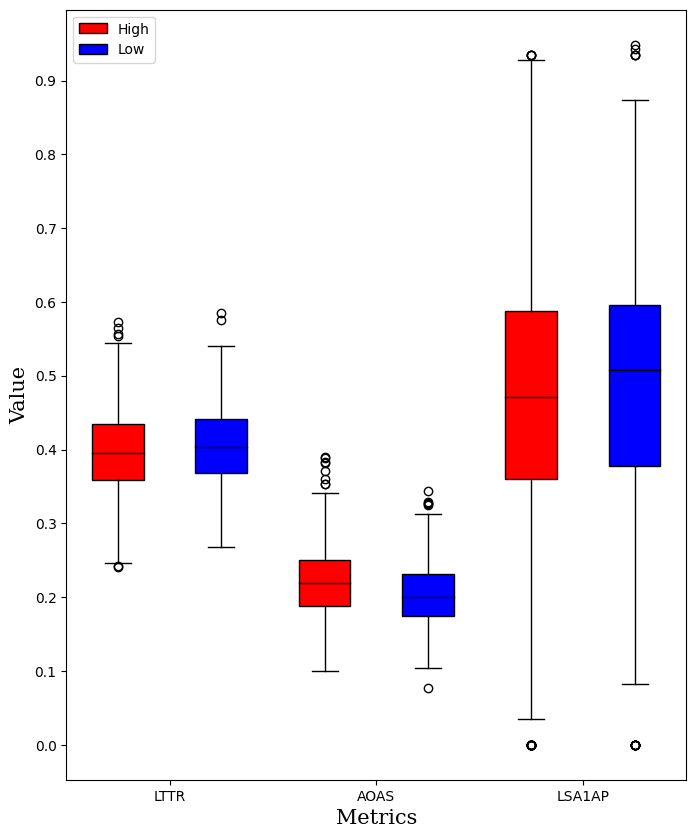

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8,10))
data = [
    df_high["lemma_ttr"], df_low["lemma_ttr"], 
    df_high["adjacent_overlap_all_sent"], df_low["adjacent_overlap_all_sent"],
    df_high["lsa_1_all_para"], df_low["lsa_1_all_para"],
]
box1 = ax1.boxplot(data, patch_artist=True)

plt.setp(box1["boxes"][0], facecolor="red")
plt.setp(box1["boxes"][1], facecolor="blue")

plt.setp(box1["boxes"][2], facecolor="red")
plt.setp(box1["boxes"][3], facecolor="blue")

plt.setp(box1["boxes"][4], facecolor="red")
plt.setp(box1["boxes"][5], facecolor="blue")

for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(box1[element], color="black")

ax1.legend([box1["boxes"][0], box1["boxes"][1]], ['High', 'Low'])

# ax1.set_title('Grouped Box Plot', fontdict={"family": "serif", "size": "20"})
ax1.set_xlabel('Metrics', fontdict={"family": "serif", "size": "15"})
ax1.set_ylabel('Value', fontdict={"family": "serif", "size": "15"})

plt.xticks([1.5, 3.5, 5.5], ['LTTR', 'AOAS', 'LSA1AP'])
plt.yticks(np.arange(0, 1, 0.1))

plt.savefig("boxplot.png")
plt.show()